In [1]:
from lets_plot import *
import pandas as pd
import requests
import json
from shapely.geometry import Point
from shapely.geometry import MultiPolygon, Polygon, LinearRing, Point, mapping
import geopandas as gpd
import fiona



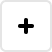
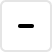
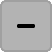
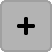
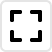
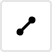
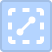

In [2]:
LetsPlot.setup_html()

In [3]:
votes=dict(state=['California','Nevada','Utah', 'Arizona'],\
           vote=['Clinton','Clinton','Trump','Trump'])

In [4]:
centroids = gpd.GeoDataFrame(
    data={'key': ['California', 'Nevada', 'Utah', 'Arizona'],
          'coord': [
              Point(-119.99411, 37.27734), 
              Point(-116.66696, 38.50308),
              Point(-111.54916, 39.49887),
              Point(-111.66859, 34.16854)]},
    geometry='coord')
centroids

key                        coord
0  California  POINT (-119.99411 37.27734)
1      Nevada  POINT (-116.66696 38.50308)
2        Utah  POINT (-111.54916 39.49887)
3     Arizona  POINT (-111.66859 34.16854)

In [5]:
def download_geometry(osm_id, key_value):
    response = requests.get('http://polygons.openstreetmap.fr/get_geojson.py?id={0}&params=0'.format(osm_id))
    with fiona.BytesCollection(bytes(str.encode(json.dumps(response.json()['geometries'][0])))) as f:
        frame = gpd.GeoDataFrame.from_features(f, crs=f.crs)
       # frame['geometry'] = frame.simplify(0.1)
        frame['key'] = key_value
        return frame

In [6]:
nv = download_geometry(165473, 'Nevada')
ca = download_geometry(165475, 'California')
ut = download_geometry(161993, 'Utah')
ar = download_geometry(162018, 'Arizona')

D:\anaconda3\envs\lets-plot-docs\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [7]:
boundaries = ar
boundaries = pd.concat([boundaries, ca], ignore_index=True)
boundaries = pd.concat([boundaries, ut], ignore_index=True)
boundaries = pd.concat([boundaries, nv], ignore_index=True)
boundaries['geometry'] = boundaries.simplify(0.1) 
boundaries

geometry         key
0  POLYGON ((-114.81358 32.49408, -111.07483 31.3...     Arizona
1  MULTIPOLYGON (((-124.32884 41.99833, -119.9994...  California
2  POLYGON ((-114.05283 37.57353, -114.05014 36.9...        Utah
3  POLYGON ((-120.00556 39.25841, -120.00102 38.9...      Nevada

In [8]:
polygon = gpd.GeoDataFrame(
    data={'key': ['Polygon'],
          'coord': [Polygon(LinearRing([(-123, 34), (-120, 35), (-118, 32)]))]},
    geometry='coord')
polygon


key                                              coord
0  Polygon  POLYGON ((-123.00000 34.00000, -120.00000 35.0...

### GeoDataFrame in the map parameter using map_id
The data specified in the *data* and *map* parameters is merged by a key value from the *map_id* aesthetic. 

In [9]:
ggplot() + geom_polygon(aes(fill='vote'), data = votes, map = boundaries, map_join=('state', 'key'), color='gray', alpha=0.4)

### GeoDataFrame in data parameter
GeoDataFrame is supported natively in the *data* parameter. It works without *map_id.*  
Geometries are automatically taken from GeoDataFrame.

In [10]:
p = ggplot() 
p += geom_polygon(aes(fill='key'), boundaries, alpha=1) + scale_fill_hue(h = (0, 90))
p += geom_path(map=centroids, color='red', linetype=2, size =1)
p += geom_point(aes(fill='key'), data = centroids, color='gray', size = 10)
p += geom_rect(aes(fill='key'), polygon, color='gray', size=2)
p

TypeError: geom_polygon() takes from 0 to 1 positional arguments but 2 were given

#### Combining layers from the data and map parameters

In [ ]:
ggplot() + geom_map(aes(fill='key'), boundaries,  alpha=0.4) + geom_point(aes(color='vote'), votes, map=centroids, map_join=('state', 'key'), size=10)+ scale_fill_hue()